In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline  

In [2]:
with open('wpd.json', 'r') as f:
    data = ''.join(f.readlines())

data = json.loads(data)
extract = list()

for pt in data['datasetColl'][0]['data']:
    [guns, shooters] = pt['value']
    country = ''
    if guns > 80:
        country = 'united states'
    if shooters > 30:
        country = 'yemen'

    extract.append([guns, shooters, country])


frame = pd.DataFrame(extract, columns=['guns', 'shooters', 'country'])


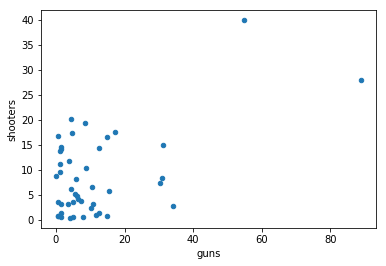

In [3]:
frame.plot.scatter('guns','shooters')

In [4]:
frame.corr()

,guns,shooters
guns,1.000000,0.529725
shooters,0.529725,1.000000


In [5]:
nous = frame[frame['country']!='united states']
nous.corr()

,guns,shooters
guns,1.000000,0.423134
shooters,0.423134,1.000000


In [6]:
neither = frame[(frame['country']!='united states') & (frame['country']!='yemen')]
neither.corr()

,guns,shooters
guns,1.00000,0.05337
shooters,0.05337,1.00000


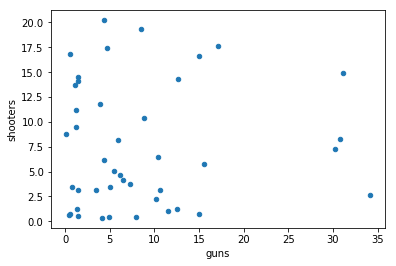

In [7]:
neither.plot.scatter('guns','shooters')